# **Indice**

>[Indice](#scrollTo=-NtvHqXsH6uk)

>[Importación de Librerías](#scrollTo=gTW_MP0BL3t5)

>[Carga de Bases de Datos](#scrollTo=E_gkziOML6yH)

>>[Base de Datos de Alumnos](#scrollTo=0nKKNnErMBkX)

>>>[Unión de las notas de Matemática, Lengua y Ciencia](#scrollTo=Vz5iDtkVHqCz)

>>>[Ponderación de alumnos](#scrollTo=qqE7zr8kCA5s)

>>>[Codificación de variables categóricas](#scrollTo=q7UaoJjf0dep)

>>[Base de Datos de Escuelas](#scrollTo=SrUy6FpHNe5p)

>>>[Codificación de variables categóricas](#scrollTo=hjY20MC1ucmb)

>[Unión de las bases de datos](#scrollTo=FSM8b93F0Uw0)

>>[Análisis de valores nulos](#scrollTo=NsnBiJwyS0R0)

>>[Análisis de valores outliers](#scrollTo=QnQiDLmwTRNk)



# **Importación de Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
# drive.mount('/content/drive')

# Para que no muestre warnings innecesarios al leer los excel
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

# **Carga de Bases de Datos**

In [ ]:
# Base Estudiantes
url = 'https://raw.githubusercontent.com/ifichetti/2024-Diplodatos-FCE-FAMAF/main/2018_PISA_Estudiantes_ARG_Short.csv'
pisa_stu = pd.read_csv(url)

In [ ]:
# Base Escuelas
url = 'https://raw.githubusercontent.com/ifichetti/2024-Diplodatos-FCE-FAMAF/main/2018_PISA_Escuelas_ARG_Short.csv'
pisa_sch = pd.read_csv(url)

In [ ]:
# Excel con códigos
url_code = 'https://github.com/ifichetti/2024-Diplodatos-FCE-FAMAF/raw/main/PISA2018_CODEBOOK.xlsx'

with pd.ExcelFile(url_code, engine='openpyxl') as xls:
    # Excel de Estudiantes
    stu_excel = pd.read_excel(xls, sheet_name="CY07_MSU_STU_QQQ")
    # Excel de Escuelas
    sch_excel = pd.read_excel(xls, sheet_name="CY07_MSU_SCH_QQQ")

## **Base de Datos de Alumnos**

In [ ]:
# Hacemos copias para no modificar las originales
pisa_stu_copy = pisa_stu.copy()
stu_excel_copy = stu_excel.copy()

In [ ]:
pisa_stu.head()

,Unnamed: 0,CNTSCHID,CNTSTUID,SUBNATIO,ST004D01T,AGE,PARED,HISEI,IMMIG,DURECEC,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,0,3200001.0,3200083.0,320200,1.0,16.08,6.0,26.62,1.0,1.0,...,395.227,362.115,386.660,361.476,340.834,333.470,369.345,446.323,345.570,387.426
1,1,3200001.0,3200164.0,320200,2.0,16.08,10.0,22.57,3.0,1.0,...,486.810,481.359,459.667,574.695,541.125,436.858,422.669,428.442,433.609,501.862
2,2,3200001.0,3201133.0,320200,1.0,15.58,12.0,51.01,1.0,3.0,...,346.635,371.325,428.804,436.787,431.976,411.510,394.511,363.953,301.070,404.598
3,3,3200001.0,3201511.0,320200,1.0,15.25,12.0,30.78,1.0,2.0,...,313.662,280.828,244.513,222.501,230.270,316.224,300.154,365.413,313.375,329.205
4,4,3200001.0,3202432.0,320200,1.0,15.42,10.0,36.35,NaN,3.0,...,384.322,257.172,209.654,278.724,342.303,368.155,178.668,301.385,244.313,233.357


In [ ]:
# Removemos la primer columna, que actúa de índice
pisa_stu_copy.drop(columns=['Unnamed: 0'], inplace=True)
pisa_stu_copy.head()

,CNTSCHID,CNTSTUID,SUBNATIO,ST004D01T,AGE,PARED,HISEI,IMMIG,DURECEC,REPEAT,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,3200001.0,3200083.0,320200,1.0,16.08,6.0,26.62,1.0,1.0,1.0,...,395.227,362.115,386.660,361.476,340.834,333.470,369.345,446.323,345.570,387.426
1,3200001.0,3200164.0,320200,2.0,16.08,10.0,22.57,3.0,1.0,1.0,...,486.810,481.359,459.667,574.695,541.125,436.858,422.669,428.442,433.609,501.862
2,3200001.0,3201133.0,320200,1.0,15.58,12.0,51.01,1.0,3.0,0.0,...,346.635,371.325,428.804,436.787,431.976,411.510,394.511,363.953,301.070,404.598
3,3200001.0,3201511.0,320200,1.0,15.25,12.0,30.78,1.0,2.0,0.0,...,313.662,280.828,244.513,222.501,230.270,316.224,300.154,365.413,313.375,329.205
4,3200001.0,3202432.0,320200,1.0,15.42,10.0,36.35,NaN,3.0,1.0,...,384.322,257.172,209.654,278.724,342.303,368.155,178.668,301.385,244.313,233.357


In [ ]:
pisa_stu_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11975 entries, 0 to 11974
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CNTSCHID      11975 non-null  float64
 1   CNTSTUID      11975 non-null  float64
 2   SUBNATIO      11975 non-null  int64  
 3   ST004D01T     11975 non-null  float64
 4   AGE           11975 non-null  float64
 5   PARED         11657 non-null  float64
 6   HISEI         10954 non-null  float64
 7   IMMIG         11288 non-null  float64
 8   DURECEC       10351 non-null  float64
 9   REPEAT        11702 non-null  float64
 10  SCCHANGE      0 non-null      float64
 11  STUBMI        0 non-null      float64
 12  ESCS          11845 non-null  float64
 13  ICTHOME       0 non-null      float64
 14  ICTSCH        0 non-null      float64
 15  CULTPOSS      11597 non-null  float64
 16  DISCLIMA      11541 non-null  float64
 17  EMOSUPS       8280 non-null   float64
 18  BEINGBULLIED  7770 non-nul

### **Presencia de valores nulos**

En base a lo devuelto por el código anterior, se puede ver que hay columnas que tienen **todos sus valores en nulos**. Veamos cuáles son esas columnas exactamente y más adelante vamos a ver qué representan:

In [ ]:
pisa_stu_cols_all_nan = list(pisa_stu.columns[pisa_stu.isnull().all()])
pisa_stu_cols_all_nan

['SCCHANGE', 'STUBMI', 'ICTHOME', 'ICTSCH', 'BODYIMA']

También se puede ver que hay columnas que tienen algunos valores nulos. Veamos cuáles son y cuántos valores nulos tienen:

In [ ]:
# Nos fijamos con las que tienen estrictamente algunos valores en nulos (no todos,
# eso ya lo tenemos antes)
pisa_stu_cols_some_nan = list(
    set(pisa_stu_copy.columns[pisa_stu_copy.isnull().any()]) - set(pisa_stu_cols_all_nan)
)

# Cantidad de valores nulos en cada columna
pisa_stu_cols_some_nan_amount = pisa_stu_copy.isna().sum()[pisa_stu_cols_some_nan]

# Porcentaje de valores nulos en cada columna
pisa_stu_cols_some_nan_percentage = pisa_stu_cols_some_nan_amount / len(pisa_stu_copy) * 100
pisa_stu_cols_some_nan_percentage

,0
PARED,2.655532
BEINGBULLIED,35.114823
HISEI,8.526096
IMMIG,5.736952
CULTPOSS,3.156576
DISCLIMA,3.624217
PERCOMP,31.799582
ESCS,1.085595
DURECEC,13.561587
REPEAT,2.279749


Más adelante en este Colab analizaremos estos valores en profundidad.

Veamos si hay valores duplicados:

In [ ]:
duplicates = pisa_stu_copy.duplicated()
print(f"Cantidad de filas duplicadas: {duplicates.sum()}")

Cantidad de filas duplicadas: 0


### **Signficado de las columnas**

Veamos qué signfica cada una de estas columnas a partir de la información que aparece en el Excel para tener un mayor entendimiento de los datos con los que contamos:

In [ ]:
stu_excel.head(10)

,CY07_MSU_STU_QQQ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Student questionnaire data files,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
2,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,6359,1.039045
4,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),6827,1.115516
5,NaN,NaN,NaN,NaN,NaN,NaN,32,Argentina,11975,1.956687
6,NaN,NaN,NaN,NaN,NaN,NaN,36,Australia,14273,2.332174
7,NaN,NaN,NaN,NaN,NaN,NaN,40,Austria,6802,1.111431
8,NaN,NaN,NaN,NaN,NaN,NaN,56,Belgium,8475,1.384795
9,NaN,NaN,NaN,NaN,NaN,NaN,70,Bosnia and Herzegovina,6480,1.058817


In [ ]:
# Cambiemos los nombres de las columnas por los que aparecen en la fila 1
old_columns = list(stu_excel.columns)
new_columns = list(stu_excel.iloc[1])
stu_excel_copy.rename(
    columns={old_columns[i]: new_columns[i] for i in range(len(old_columns))},
    inplace=True
)
print(stu_excel_copy.columns)
stu_excel_copy.head()

Index(['NAME', 'VARLABEL', 'TYPE', 'FORMAT', 'VARNUM', 'MINMAX', 'VAL',
       'LABEL', 'COUNT', 'PERCENT'],
      dtype='object')


,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,Student questionnaire data files,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
2,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,6359,1.039045
4,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),6827,1.115516


In [ ]:
# Y ahora borremos las primeras dos filas, que no nos sirven de nada
stu_excel_final = stu_excel_copy[2:].reset_index(drop=True)
stu_excel_final.head()

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,6359,1.039045
2,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),6827,1.115516
3,NaN,NaN,NaN,NaN,NaN,NaN,32,Argentina,11975,1.956687
4,NaN,NaN,NaN,NaN,NaN,NaN,36,Australia,14273,2.332174


In [ ]:
# Nos quedamos solamente con las columnas correspondientes a datos sobre las variables
stu_vars_df = stu_excel_final.drop(columns=['VAL', 'LABEL', 'COUNT', 'PERCENT', 'VARNUM'])

# Eliminamos las filas que tengan sus entradas todas nulas (estas filas van a ser
# las que contengan valores de las variables pero no información sobre qué
# significan)
stu_vars_df.dropna(how='all', inplace=True)

stu_vars_df.head(10)

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
0,CNTRYID,Country Identifier,NUM,3.0,8-983
84,CNT,Country code 3-character,CHAR,$3.,NaN
167,CNTSCHID,Intl. School ID,NUM,8.0,800002-98300806
169,CNTSTUID,Intl. Student ID,NUM,8.0,800001-98329122
171,CYC,PISA Assessment Cycle (2 digits + 2 character ...,CHAR,$4.,NaN
172,NatCen,National Centre 6-digit Code,CHAR,$6.,NaN
253,STRATUM,Stratum ID 7-character (cnt + region ID + orig...,CHAR,$7.,NaN
1732,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,NaN
1824,OECD,OECD country,NUM,1.0,0-1
1828,ADMINMODE,Mode of Respondent,NUM,1.0,1-2


In [ ]:
# Chequeamos por las dudas que todas las columnas de la base de datos de alumnos
# aparezcan en las variables del cuestionario
assert ([v for v in list(pisa_stu_copy.columns) if v not in list(stu_vars_df['NAME'])]) == []

In [ ]:
# Finalmente tenemos información sobre qué significa cada una de las columnas
# de la base de datos de los alumnos
stu_vars_df = stu_vars_df[stu_vars_df.NAME.isin(list(pisa_stu.columns))]
stu_vars_df.reset_index(drop=True, inplace=True)
stu_vars_df

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
0,CNTSCHID,Intl. School ID,NUM,8.0,800002-98300806
1,CNTSTUID,Intl. Student ID,NUM,8.0,800001-98329122
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,NaN
3,ST004D01T,Student (Standardized) Gender,NUM,1.0,1-2
4,AGE,Age,NUM,7.2,15.08-16.33
5,PARED,Index highest parental education in years of s...,NUM,7.2,3-18
6,HISEI,Index highest parental occupational status,NUM,6.2,11.01-88.96
7,IMMIG,Index Immigration status,NUM,1.0,1-3
8,DURECEC,Duration in early childhood education and care,NUM,2.0,0-8
9,REPEAT,Grade Repetition,NUM,1.0,0-1


Primero, veamos qué significan las columnas que tienen todo NaN en la base de datos de alumnos:

In [ ]:
stu_vars_df[stu_vars_df.NAME.isin(pisa_stu_cols_all_nan)]

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
10,SCCHANGE,Number of school changes,NUM,1.0,0-2
11,STUBMI,Body mass index of student,NUM,6.2,7.18-271.27
13,ICTHOME,ICT available at home,NUM,2.0,0-11
14,ICTSCH,ICT available at school,NUM,2.0,0-10
20,BODYIMA,Body image (WLE),NUM,7.4,-2.4111-1.8425


Decidimos eliminar estas columnas del dataframe:

In [ ]:
pisa_stu_copy.drop(columns=pisa_stu_cols_all_nan, inplace=True)

Y veamos qué signfican las que tienen NaN en algunas de sus entradas:

In [ ]:
stu_vars_df[stu_vars_df.NAME.isin(pisa_stu_cols_some_nan)]

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
5,PARED,Index highest parental education in years of s...,NUM,7.2,3-18
6,HISEI,Index highest parental occupational status,NUM,6.2,11.01-88.96
7,IMMIG,Index Immigration status,NUM,1.0,1-3
8,DURECEC,Duration in early childhood education and care,NUM,2.0,0-8
9,REPEAT,Grade Repetition,NUM,1.0,0-1
12,ESCS,"Index of economic, social and cultural status",NUM,7.4,-8.1734-4.2051
15,CULTPOSS,Cultural possessions at home (WLE),NUM,7.4,-2.8044-2.3842
16,DISCLIMA,Disciplinary climate in test language lessons ...,NUM,7.4,-2.7124-2.3017
17,EMOSUPS,Parents' emotional support perceived by studen...,NUM,7.4,-2.4468-1.0346
18,PERCOMP,Perception of competitiveness at school (WLE),NUM,7.4,-1.9892-2.0378


### **Unión de las notas de Matemática, Lengua y Ciencia**

Juntamos las notas de Matemática, Lengua y Ciencia en una misma sacando el promedio de las 10 que aparecen en la base de datos:

In [ ]:
pisa_stu_copy.columns

Index(['CNTSCHID', 'CNTSTUID', 'SUBNATIO', 'ST004D01T', 'AGE', 'PARED',
       'HISEI', 'IMMIG', 'DURECEC', 'REPEAT', 'ESCS', 'CULTPOSS', 'DISCLIMA',
       'EMOSUPS', 'BEINGBULLIED', 'PERCOMP', 'W_FSTUWT', 'PV2MATH', 'PV3MATH',
       'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH',
       'PV10MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
       'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ', 'PV1SCIE',
       'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE',
       'PV8SCIE', 'PV9SCIE', 'PV10SCIE'],
      dtype='object')

In [ ]:
pisa_stu_copy['MATH'] = pisa_stu_copy.loc[:, 'PV2MATH':'PV10MATH'].mean(axis=1)
pisa_stu_copy['READ'] = pisa_stu_copy.loc[:, 'PV1READ':'PV10READ'].mean(axis=1)
pisa_stu_copy['SCIE'] = pisa_stu_copy.loc[:, 'PV1SCIE':'PV10SCIE'].mean(axis=1)
pisa_stu_copy.head()

,CNTSCHID,CNTSTUID,SUBNATIO,ST004D01T,AGE,PARED,HISEI,IMMIG,DURECEC,REPEAT,...,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,MATH,READ,SCIE
0,3200001.0,3200083.0,320200,1.0,16.08,6.0,26.62,1.0,1.0,1.0,...,361.476,340.834,333.470,369.345,446.323,345.570,387.426,290.451000,397.8088,372.8446
1,3200001.0,3200164.0,320200,2.0,16.08,10.0,22.57,3.0,1.0,1.0,...,574.695,541.125,436.858,422.669,428.442,433.609,501.862,336.169667,430.8935,476.7096
2,3200001.0,3201133.0,320200,1.0,15.58,12.0,51.01,1.0,3.0,0.0,...,436.787,431.976,411.510,394.511,363.953,301.070,404.598,379.862222,374.8726,389.1169
3,3200001.0,3201511.0,320200,1.0,15.25,12.0,30.78,1.0,2.0,0.0,...,222.501,230.270,316.224,300.154,365.413,313.375,329.205,270.906667,293.5477,291.6145
4,3200001.0,3202432.0,320200,1.0,15.42,10.0,36.35,NaN,3.0,1.0,...,278.724,342.303,368.155,178.668,301.385,244.313,233.357,316.891111,323.9670,279.8053


In [ ]:
pisa_stu_copy.drop(columns=[f'PV{i}MATH' for i in range(2,11)], inplace=True)
pisa_stu_copy.drop(columns=[f'PV{i}{j}' for i in range(1,11) for j in ['READ', 'SCIE']], inplace=True)

In [ ]:
print(pisa_stu_copy.columns)
pisa_stu_copy.head()

Index(['CNTSCHID', 'CNTSTUID', 'SUBNATIO', 'ST004D01T', 'AGE', 'PARED',
       'HISEI', 'IMMIG', 'DURECEC', 'REPEAT', 'ESCS', 'CULTPOSS', 'DISCLIMA',
       'EMOSUPS', 'BEINGBULLIED', 'PERCOMP', 'W_FSTUWT', 'MATH', 'READ',
       'SCIE'],
      dtype='object')


,CNTSCHID,CNTSTUID,SUBNATIO,ST004D01T,AGE,PARED,HISEI,IMMIG,DURECEC,REPEAT,ESCS,CULTPOSS,DISCLIMA,EMOSUPS,BEINGBULLIED,PERCOMP,W_FSTUWT,MATH,READ,SCIE
0,3200001.0,3200083.0,320200,1.0,16.08,6.0,26.62,1.0,1.0,1.0,-2.3931,-0.6264,-2.7124,-0.6576,NaN,NaN,87.06638,290.451000,397.8088,372.8446
1,3200001.0,3200164.0,320200,2.0,16.08,10.0,22.57,3.0,1.0,1.0,-1.9488,0.0304,-1.0454,NaN,NaN,NaN,128.30684,336.169667,430.8935,476.7096
2,3200001.0,3201133.0,320200,1.0,15.58,12.0,51.01,1.0,3.0,0.0,-0.7797,-0.9795,0.0444,NaN,NaN,NaN,87.06638,379.862222,374.8726,389.1169
3,3200001.0,3201511.0,320200,1.0,15.25,12.0,30.78,1.0,2.0,0.0,-1.9261,-2.2054,-0.4652,-0.6576,1.4812,-1.0299,87.06638,270.906667,293.5477,291.6145
4,3200001.0,3202432.0,320200,1.0,15.42,10.0,36.35,NaN,3.0,1.0,-2.0159,-1.2131,-2.7124,-1.8598,NaN,NaN,94.26165,316.891111,323.9670,279.8053


Y actualicemos `pisa_stu_df` para que ahora también contenga a estas nuevas columnas y saque a las otras:

In [ ]:
# Math row
math_min = round(pisa_stu_copy.MATH.min(), 3)
math_max = round(pisa_stu_copy.MATH.max(), 3)
math_range = str(math_min) + "-" + str(math_max)
math_row = {'NAME':'MATH', 'VARLABEL': 'Average Value in Mathematics', 'TYPE':'NUM', 'FORMAT': '3.0', 'MINMAX': math_range}

# Read row
read_min = round(pisa_stu_copy.READ.min(), 3)
read_max = round(pisa_stu_copy.READ.max(), 3)
read_range = str(read_min) + "-" + str(read_max)
read_row = {'NAME':'READ', 'VARLABEL': 'Average Value in Reading', 'TYPE':'NUM', 'FORMAT': '3.0', 'MINMAX': read_range}

# Science row
scie_min = round(pisa_stu_copy.SCIE.min(), 3)
scie_max = round(pisa_stu_copy.SCIE.max(), 3)
scie_range = str(scie_min) + "-" + str(scie_max)
scie_row = {'NAME':'SCIE', 'VARLABEL': 'Average Value in Science', 'TYPE':'NUM', 'FORMAT': '3.0', 'MINMAX': scie_range}

new_rows = pd.DataFrame([math_row, read_row, scie_row])

# Utilizamos el método concat para concatenar el dataframe anterior con este nuevo
# que solamente incluye estas tres filas:
stu_vars_df = pd.concat([stu_vars_df, new_rows], ignore_index=True)

# Le hacemos el drop_duplicates por si corremos esta celda varias veces para que
# no agregue MATH, SCIE y READ varias veces
stu_vars_df.drop_duplicates(inplace=True)

# Y nos quedamos solamente con las que aparecen en el df modificado de los alumnos
stu_vars_df = stu_vars_df[stu_vars_df.NAME.isin(list(pisa_stu_copy.columns))].reset_index(drop=True)

stu_vars_df

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
0,CNTSCHID,Intl. School ID,NUM,8.0,800002-98300806
1,CNTSTUID,Intl. Student ID,NUM,8.0,800001-98329122
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,NaN
3,GENDER,Student (Standardized) Gender,NUM,1.0,1-2
4,AGE,Age,NUM,7.2,15.08-16.33
5,PARED,Index highest parental education in years of s...,NUM,7.2,3-18
6,HISEI,Index highest parental occupational status,NUM,6.2,11.01-88.96
7,IMMIG,Index Immigration status,NUM,1.0,1-3
8,DURECEC,Duration in early childhood education and care,NUM,2.0,0-8
9,REPEAT,Grade Repetition,NUM,1.0,0-1


Cambiemos también el nombre de la columna `ST004D01T` por `GENDER`:

In [ ]:
pisa_stu_copy.rename(columns={'ST004D01T': 'GENDER'}, inplace=True)
pisa_stu_copy.head(5)

,CNTSCHID,CNTSTUID,SUBNATIO,GENDER,AGE,PARED,HISEI,IMMIG,DURECEC,REPEAT,ESCS,CULTPOSS,DISCLIMA,EMOSUPS,BEINGBULLIED,PERCOMP,W_FSTUWT,MATH,READ,SCIE
0,3200001.0,3200083.0,320200,1.0,16.08,6.0,26.62,1.0,1.0,1.0,-2.3931,-0.6264,-2.7124,-0.6576,NaN,NaN,87.06638,290.451000,397.8088,372.8446
1,3200001.0,3200164.0,320200,2.0,16.08,10.0,22.57,3.0,1.0,1.0,-1.9488,0.0304,-1.0454,NaN,NaN,NaN,128.30684,336.169667,430.8935,476.7096
2,3200001.0,3201133.0,320200,1.0,15.58,12.0,51.01,1.0,3.0,0.0,-0.7797,-0.9795,0.0444,NaN,NaN,NaN,87.06638,379.862222,374.8726,389.1169
3,3200001.0,3201511.0,320200,1.0,15.25,12.0,30.78,1.0,2.0,0.0,-1.9261,-2.2054,-0.4652,-0.6576,1.4812,-1.0299,87.06638,270.906667,293.5477,291.6145
4,3200001.0,3202432.0,320200,1.0,15.42,10.0,36.35,NaN,3.0,1.0,-2.0159,-1.2131,-2.7124,-1.8598,NaN,NaN,94.26165,316.891111,323.9670,279.8053


In [ ]:
stu_vars_df.iloc[3,0] = 'GENDER'
stu_vars_df

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
0,CNTSCHID,Intl. School ID,NUM,8.0,800002-98300806
1,CNTSTUID,Intl. Student ID,NUM,8.0,800001-98329122
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,NaN
3,GENDER,Student (Standardized) Gender,NUM,1.0,1-2
4,AGE,Age,NUM,7.2,15.08-16.33
5,PARED,Index highest parental education in years of s...,NUM,7.2,3-18
6,HISEI,Index highest parental occupational status,NUM,6.2,11.01-88.96
7,IMMIG,Index Immigration status,NUM,1.0,1-3
8,DURECEC,Duration in early childhood education and care,NUM,2.0,0-8
9,REPEAT,Grade Repetition,NUM,1.0,0-1


### **Ponderación de alumnos**

Una de las variables que está en la base de datos de alumnos se llama `W_FSTUWT`, que según `stu_vars_df` significa: `FINAL TRIMMED NONRESPONSE ADJUSTED STUDENT WEIGHT`. Esta variable hace referencia al peso (ponderación) que se le da a cada alumno para asegurar que los resultados son representativos sobre toda la población.

Entonces, al trabajar con alumnos deberíamos tener en cuenta esta variable. Para esto, existen dos alternativas:
1. En la base de datos, multiplicamos cada fila (que representa un alumno) por su ponderación. Si bien vamos a tener filas duplicadas y el tamaño de la base de datos va a ser mayor, facilita la consideración de esta variable.
2. Al hacer análisis, considerar las ponderaciones manualmente.

En principio, optamos por la alternativa 1. Si el tamaño de la base sigue siendo manejable, vamos a seguir con esta.

In [ ]:
pisa_stu_copy['W_FSTUWT']

,W_FSTUWT
0,87.06638
1,128.30684
2,87.06638
3,87.06638
4,94.26165
...,...
11970,78.52822
11971,78.52822
11972,78.52822
11973,78.52822


Vemos que la variable toma valores flotantes. Para hacer la multiplicación de filas, necesitamos tener valores enteros. Lo que vamos a hacer es redondear cada valor:

In [ ]:
pisa_stu_copy['W_FSTUWT'] = pisa_stu_copy['W_FSTUWT'].apply(lambda x: int(round(x, 0)))
pisa_stu_copy['W_FSTUWT']

,W_FSTUWT
0,87
1,128
2,87
3,87
4,94
...,...
11970,79
11971,79
11972,79
11973,79


In [ ]:
# La cantidad total de filas de la base ponderada sería:
pisa_stu_copy['W_FSTUWT'].sum()

566250

Sigue estando bastante bien, así que vamos con esta opción:

In [77]:
len(pisa_stu_copy)

11975

In [ ]:
pisa_stu_weighed = pisa_stu_copy.loc[pisa_stu_copy.index.repeat(pisa_stu_copy['W_FSTUWT'])]

In [ ]:
# Eliminamos la columna del dataset
pisa_stu_weighed.drop(columns=['W_FSTUWT'], inplace=True)

In [ ]:
# También eliminamos la variable del DataFrame que contiene los significados
# de las variables
stu_vars_df = stu_vars_df[stu_vars_df['NAME'] != 'W_FSTUWT'].reset_index(drop=True)
stu_vars_df

,NAME,VARLABEL,TYPE,FORMAT,MINMAX
0,CNTSCHID,Intl. School ID,NUM,8.0,800002-98300806
1,CNTSTUID,Intl. Student ID,NUM,8.0,800001-98329122
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,NaN
3,GENDER,Student (Standardized) Gender,NUM,1.0,1-2
4,AGE,Age,NUM,7.2,15.08-16.33
5,PARED,Index highest parental education in years of s...,NUM,7.2,3-18
6,HISEI,Index highest parental occupational status,NUM,6.2,11.01-88.96
7,IMMIG,Index Immigration status,NUM,1.0,1-3
8,DURECEC,Duration in early childhood education and care,NUM,2.0,0-8
9,REPEAT,Grade Repetition,NUM,1.0,0-1


Ahora bien, el porcentaje de valores nulos que había antes con esta ponderación puede haber cambiado. Veámoslo:

In [ ]:
# Primero, recordemos los porcentajes originales
pisa_stu_cols_some_nan_percentage.sort_values()

,0
ESCS,1.085595
REPEAT,2.279749
PARED,2.655532
CULTPOSS,3.156576
DISCLIMA,3.624217
IMMIG,5.736952
HISEI,8.526096
DURECEC,13.561587
EMOSUPS,30.855950
PERCOMP,31.799582


In [ ]:
# Nos fijamos con las que tienen estrictamente algunos valores en nulos (no todos,
# eso ya lo tenemos antes)
pisa_stu_weighed_cols_some_nan = list(pisa_stu_weighed.columns[pisa_stu_weighed.isnull().any()])

# Cantidad de valores nulos en cada columna
pisa_stu_weighed_cols_some_nan_amount = pisa_stu_weighed.isnull().sum()[pisa_stu_weighed_cols_some_nan]

# Porcentaje de valores nulos en cada columna
pisa_stu_weighed_cols_some_nan_percentage = pisa_stu_weighed_cols_some_nan_amount / len(pisa_stu_weighed) * 100
pisa_stu_weighed_cols_some_nan_percentage.sort_values()

,0
ESCS,1.281589
REPEAT,2.534393
PARED,3.068786
CULTPOSS,3.438234
DISCLIMA,4.694746
IMMIG,5.946313
HISEI,9.053775
DURECEC,14.612627
EMOSUPS,31.808742
PERCOMP,32.626755


### **Codificación de variables categóricas**

Podemos ver que las siguientes son variables categóricas:
- `SUBNATIO`: región de Argentina a la que pertenece el alumno
- `GENDER`: género del alumno
- `IMMIG`: status migratorio del alumno
- `REPEAT`: indica si el alumno repitió de grado o no

Reemplacemos los valores numéricos en estas columnas por su codificación, la cual se encuentra en el Excel.

In [ ]:
stu_excel_final

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,6359,1.039045
2,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),6827,1.115516
3,NaN,NaN,NaN,NaN,NaN,NaN,32,Argentina,11975,1.956687
4,NaN,NaN,NaN,NaN,NaN,NaN,36,Australia,14273,2.332174
...,...,...,...,...,...,...,...,...,...,...
14742,PV10RTML,Plausible Value 10 in Text Structure Subscale ...,NUM,8.3,1116,53.21-940.246,NaN,NaN,NaN,NaN
14743,NaN,NaN,NaN,NaN,NaN,NaN,SYSTEM MISSING,Missing,60074,9.815949
14744,SENWT,Senate Weight (sum of 5000 per country),NUM,12.5,1117,0.00478-9.16893,NaN,NaN,NaN,NaN
14745,NaN,NaN,NaN,NaN,NaN,NaN,SYSTEM MISSING,Missing,0,0


In [ ]:
stu_excel_final.loc[stu_excel_final.NAME == 'ST004D01T', 'NAME'] = 'GENDER'

In [ ]:
stu_encoding = stu_excel_final.copy()

# Aplicar ffill para repetir el nombre de la variable, solo a las primeras seis
# columnas para así poder reconocer a qué variable corresponden todos los valores
stu_encoding.iloc[:, :6] = stu_encoding.iloc[:, :6].ffill()

# Y nos quedemos solamente con las variables que aparecen en la base de datos
# de alumnos
stu_encoding = stu_encoding[stu_encoding.NAME.isin(pisa_stu_weighed.columns)].reset_index(drop=True)

# Y nos acordamos de agregar las nuevas columnas MATH, READ y SCIE
# Y agregamos el if por si la celda se corre dos veces
if 'MATH' not in list(stu_encoding['NAME'].unique()):
    stu_encoding = pd.concat([stu_encoding, new_rows], ignore_index=True)

stu_encoding

<ipython-input-38-9c17c62379e1>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stu_encoding.iloc[:, :6] = stu_encoding.iloc[:, :6].ffill()


,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTSCHID,Intl. School ID,NUM,8.0,3,800002-98300806,NaN,NaN,NaN,NaN
1,CNTSCHID,Intl. School ID,NUM,8.0,3,800002-98300806,SYSTEM MISSING,Missing,0,0
2,CNTSTUID,Intl. Student ID,NUM,8.0,4,800001-98329122,NaN,NaN,NaN,NaN
3,CNTSTUID,Intl. Student ID,NUM,8.0,4,800001-98329122,SYSTEM MISSING,Missing,0,0
4,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,8,800001-98329122,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
188,BEINGBULLIED,Student's experience of being bullied (WLE),NUM,7.4,916,-0.7823-3.8591,.M/9999999,No Response,141010,23.040699
189,BEINGBULLIED,Student's experience of being bullied (WLE),NUM,7.4,916,-0.7823-3.8591,SYSTEM MISSING,Missing,0,0
190,MATH,Average Value in Mathematics,NUM,3.0,NaN,128.396-654.708,NaN,NaN,NaN,NaN
191,READ,Average Value in Reading,NUM,3.0,NaN,132.317-696.337,NaN,NaN,NaN,NaN


In [ ]:
# Guardamos esto en un csv para tenerlo para más adelante
# stu_encoding.to_csv(
#     path_or_buf='/content/drive/MyDrive/DiploDatos2024/ActividadIntegradoraFinal/data/codificacion_alumnos.csv'
# )

In [ ]:
print(list(stu_encoding.NAME.unique()))
print(list(pisa_stu_copy.columns))

['CNTSCHID', 'CNTSTUID', 'SUBNATIO', 'GENDER', 'AGE', 'PARED', 'HISEI', 'IMMIG', 'DURECEC', 'REPEAT', 'ESCS', 'CULTPOSS', 'DISCLIMA', 'EMOSUPS', 'PERCOMP', 'BEINGBULLIED', 'MATH', 'READ', 'SCIE']
['CNTSCHID', 'CNTSTUID', 'SUBNATIO', 'GENDER', 'AGE', 'PARED', 'HISEI', 'IMMIG', 'DURECEC', 'REPEAT', 'ESCS', 'CULTPOSS', 'DISCLIMA', 'EMOSUPS', 'BEINGBULLIED', 'PERCOMP', 'W_FSTUWT', 'MATH', 'READ', 'SCIE']


In [ ]:
# Crear una función para que la conversión a int pueda lidiar con los NaN
def safe_convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return value

# Función que dada una columna categórica, devuelve un diccionario con la codificación
# de sus valores
def get_column_encoding(column_name: str):
    if column_name not in pisa_stu_weighed.columns:
        print("The column must be in the Students DataFrame")
        return
    values = stu_encoding[stu_encoding['NAME'] == column_name]
    values = values[['VAL', 'LABEL']]
    values.loc[: , 'VAL'] = values.loc[:, 'VAL'].apply(safe_convert_to_int)
    column_encoding = dict(zip(values['VAL'], values['LABEL']))
    return column_encoding

In [ ]:
categorical = ['GENDER', 'SUBNATIO', 'REPEAT', 'IMMIG']
encodings = {}
for var in categorical:
    encodings[var] = get_column_encoding(var)
    print(f"{var}: {encodings[var]}")

GENDER: {nan: nan, 1: 'Female', 2: 'Male', '.V/5': 'Valid Skip', '.N/7': 'Not Applicable', '.I/8': 'Invalid', '.M/9': 'No Response', 'SYSTEM MISSING': 'Missing'}
SUBNATIO: {nan: nan, 80000.0: 'Albania', 310000.0: 'Baku (Azerbaijan)', 320000.0: 'Argentina', 320100.0: 'Argentina: Ciudad Autnoma de Buenos', 320200.0: 'Argentina: Provincia de Buenos Aires', 320300.0: 'Argentina: Tucuman', 320400.0: 'Argentina: Cordoba', 360000.0: 'Australia', 400000.0: 'Austria', 560000.0: 'Belgium: Rest of the country', 560100.0: 'Belgium: Flemish community', 700000.0: 'Bosnia and Herzegovina', 760000.0: 'Brazil', 960000.0: 'Brunei Darussalam', 1000000.0: 'Bulgaria', 1120000.0: 'Belarus', 1240000.0: 'Canada', 1520000.0: 'Chile', 1580000.0: 'Chinese Taipei', 1700000.0: 'Colombia', 1880000.0: 'Costa Rica', 1910000.0: 'Croatia', 1960000.0: 'Cyprus', 2030000.0: 'Czech Republic', 2080000.0: 'Denmark', 2140000.0: 'Dominican Republic', 2330000.0: 'Estonia', 2460000.0: 'Finland', 2500000.0: 'France', 2680000.0: '

In [ ]:
# Ahora que tenemos las codificaciones, armemos el DataFrame de alumnos con las
# variables codificadas
pisa_stu_weighed_decoded = pisa_stu_weighed.copy()

for var in categorical:
    pisa_stu_weighed_decoded[var] = pisa_stu_weighed_decoded[var].replace(encodings[var])
    # Chequeamos que la codificación se haya hecho bien:
    print(f"Valores decodificados de {var}: {pisa_stu_weighed_decoded[var].unique()}")

pisa_stu_weighed_decoded.reset_index(drop=True, inplace=True)
pisa_stu_weighed_decoded.sample(10)

Valores decodificados de GENDER: ['Female' 'Male']
Valores decodificados de SUBNATIO: ['Argentina: Provincia de Buenos Aires' 'Argentina: Tucuman' 'Argentina'
 'Argentina: Cordoba' 'Argentina: Ciudad Autnoma de Buenos']
Valores decodificados de REPEAT: ['Repeated a <grade>' 'Did not repeat a <grade>' nan]
Valores decodificados de IMMIG: ['Native' 'First-Generation' nan 'Second-Generation']


,CNTSCHID,CNTSTUID,SUBNATIO,GENDER,AGE,PARED,HISEI,IMMIG,DURECEC,REPEAT,ESCS,CULTPOSS,DISCLIMA,EMOSUPS,BEINGBULLIED,PERCOMP,MATH,READ,SCIE
329189,3200265.0,3202054.0,Argentina: Provincia de Buenos Aires,Male,15.50,17.0,21.82,Native,3.0,Did not repeat a <grade>,-0.4960,-0.2301,-0.2058,-0.6576,1.1928,1.0326,358.072556,463.6655,488.6431
21464,3200018.0,3206185.0,Argentina,Female,16.00,17.0,82.41,Native,3.0,Did not repeat a <grade>,0.6126,0.1095,-1.1225,NaN,NaN,NaN,443.259111,526.7265,491.5543
147604,3200117.0,3209361.0,Argentina,Male,15.83,12.0,39.04,First-Generation,3.0,Did not repeat a <grade>,-1.0605,-0.1817,-0.8408,1.0346,0.7703,-0.6142,360.187778,443.1343,392.1428
9905,3200007.0,3213405.0,Argentina: Cordoba,Female,15.33,6.0,22.57,Native,3.0,Did not repeat a <grade>,-3.0153,-1.2696,-1.5333,-1.5847,0.1462,-0.6142,332.767000,328.3087,319.2455
204364,3200162.0,3204489.0,Argentina: Provincia de Buenos Aires,Female,15.67,14.5,25.20,Native,3.0,Did not repeat a <grade>,-0.7351,-0.7725,-0.2058,NaN,NaN,NaN,420.614889,517.6704,484.8264
443407,3200360.0,3212072.0,Argentina,Male,15.58,10.0,50.15,Native,2.0,Did not repeat a <grade>,-1.5672,-2.2054,-0.9647,-1.3914,-0.7823,-0.6142,387.820222,395.9857,448.6766
80537,3200066.0,3209741.0,Argentina: Provincia de Buenos Aires,Male,16.00,17.0,16.38,Native,3.0,Did not repeat a <grade>,-0.9192,-0.6519,-0.2058,-0.6439,1.4721,-1.0299,286.632222,276.5408,372.0082
477460,3200381.0,3213295.0,Argentina: Provincia de Buenos Aires,Female,15.25,17.0,86.72,Native,3.0,Did not repeat a <grade>,0.4721,0.1095,-0.6495,-0.6576,-0.7823,-0.6142,465.597778,469.3586,425.6665
509468,3200413.0,3214017.0,Argentina: Provincia de Buenos Aires,Female,15.67,6.0,31.08,First-Generation,2.0,Did not repeat a <grade>,-2.6359,-1.2131,-0.5964,-0.6576,-0.7823,-0.6142,291.694333,376.6756,362.9030
86543,3200071.0,3210985.0,Argentina,Female,15.42,17.0,81.92,Native,3.0,Repeated a <grade>,0.7129,0.4644,0.7843,-0.6576,NaN,-0.2309,355.751556,358.8870,376.3208


## **Base de Datos de Escuelas**
Teniendo como base lo anterior, hacemos lo mismo para las bases de datos de las escuelas

In [ ]:
# Hacemos copias para no modificar las originales
pisa_sch_copy = pisa_sch.copy()
sch_excel_copy = sch_excel.copy()

In [ ]:
pisa_sch.head()

,Unnamed: 0,CNTSCHID,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,...,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
0,0,3200001.0,public,3.0,10.6542,570.0,0.2459,1.0,53.5,1.0,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732
1,1,3200002.0,private,3.0,14.6353,622.0,0.3333,1.0,42.5,1.0,...,0.0588,53.0,1.0,-0.6884,-1.4551,-0.3856,-0.9138,0.1329,2.74044,280.92983
2,2,3200003.0,public,3.0,1.8667,56.0,0.0667,1.0,30.0,0.0,...,0.0000,13.0,1.0,1.2478,-1.4551,-1.0431,-2.0409,0.9042,177.19780,1205.45137
3,3,3200004.0,public,3.0,39.0000,39.0,NaN,NaN,1.0,1.0,...,0.0000,NaN,NaN,0.0574,0.2100,-0.9505,-1.2356,0.9042,346.38221,353.90292
4,4,3200005.0,private,2.0,10.7333,322.0,0.2381,1.0,30.0,1.0,...,NaN,28.0,2.0,-1.4212,-1.4551,-0.4515,-0.5488,-0.2798,54.98917,2443.10519


In [ ]:
pisa_sch_copy.drop(columns=['Unnamed: 0'], inplace=True)
pisa_sch_copy.head()

,CNTSCHID,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,...,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
0,3200001.0,public,3.0,10.6542,570.0,0.2459,1.0,53.5,1.0,0.8411,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732
1,3200002.0,private,3.0,14.6353,622.0,0.3333,1.0,42.5,1.0,0.8235,...,0.0588,53.0,1.0,-0.6884,-1.4551,-0.3856,-0.9138,0.1329,2.74044,280.92983
2,3200003.0,public,3.0,1.8667,56.0,0.0667,1.0,30.0,0.0,0.9333,...,0.0000,13.0,1.0,1.2478,-1.4551,-1.0431,-2.0409,0.9042,177.19780,1205.45137
3,3200004.0,public,3.0,39.0000,39.0,NaN,NaN,1.0,1.0,1.0000,...,0.0000,NaN,NaN,0.0574,0.2100,-0.9505,-1.2356,0.9042,346.38221,353.90292
4,3200005.0,private,2.0,10.7333,322.0,0.2381,1.0,30.0,1.0,NaN,...,NaN,28.0,2.0,-1.4212,-1.4551,-0.4515,-0.5488,-0.2798,54.98917,2443.10519


In [ ]:
pisa_sch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNTSCHID          455 non-null    float64
 1   PRIVATESCH        455 non-null    object 
 2   SCHLTYPE          435 non-null    float64
 3   STRATIO           394 non-null    float64
 4   SCHSIZE           416 non-null    float64
 5   RATCMP1           370 non-null    float64
 6   RATCMP2           335 non-null    float64
 7   TOTAT             418 non-null    float64
 8   PROATCE           375 non-null    float64
 9   PROAT5AB          371 non-null    float64
 10  PROAT5AM          383 non-null    float64
 11  PROAT6            379 non-null    float64
 12  CLSIZE            432 non-null    float64
 13  CREACTIV          438 non-null    float64
 14  EDUSHORT          437 non-null    float64
 15  STAFFSHORT        433 non-null    float64
 16  STUBEHA           441 non-null    float64
 1

### **Presencia de valores nulos**

Viendo la información de la base de datos, en varias columnas hay datos faltantes. Veamos cuántos hay exactamente en cada columna:

In [ ]:
pisa_sch_cols_some_nan = list(pisa_sch_copy.columns[pisa_sch_copy.isnull().any()])

# Cantidad de valores nulos en cada columna
pisa_sch_cols_some_nan_amount = pisa_sch_copy.isna().sum()[pisa_sch_cols_some_nan]

# Porcentaje de valores nulos en cada columna
pisa_sch_cols_some_nan_percentage = pisa_sch_cols_some_nan_amount / len(pisa_sch_copy) * 100
pisa_sch_cols_some_nan_percentage.sort_values()

,0
SCMCEG,3.076923
STUBEHA,3.076923
TEACHBEHA,3.076923
CREACTIV,3.736264
EDUSHORT,3.956044
SCHLTYPE,4.395604
STAFFSHORT,4.835165
CLSIZE,5.054945
TOTAT,8.131868
SCHSIZE,8.571429


Veamos también aquí si hay valores duplicados:

In [ ]:
duplicates = pisa_sch_copy.duplicated()
print(f"Cantidad de filas duplicadas: {duplicates.sum()}")

Cantidad de filas duplicadas: 0


### **Signficado de las columnas**

In [ ]:
sch_excel.head(10)

,CY07_MSU_SCH_QQQ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,School questionnaire data file,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
2,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,327,1.492946
4,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),197,0.89942
5,NaN,NaN,NaN,NaN,NaN,NaN,32,Argentina,455,2.077341
6,NaN,NaN,NaN,NaN,NaN,NaN,36,Australia,763,3.483541
7,NaN,NaN,NaN,NaN,NaN,NaN,40,Austria,291,1.328585
8,NaN,NaN,NaN,NaN,NaN,NaN,56,Belgium,288,1.314888
9,NaN,NaN,NaN,NaN,NaN,NaN,70,Bosnia and Herzegovina,213,0.97247


In [ ]:
old_columns = list(sch_excel.columns)
new_columns = list(sch_excel.iloc[1])
sch_excel_copy.rename(
    columns={old_columns[i]: new_columns[i] for i in range(len(old_columns))},
    inplace=True
)
print(sch_excel_copy.columns)
sch_excel_copy.head()

Index(['NAME', 'VARLABEL', 'TYPE', 'FORMAT', 'VARNUM', 'MINMAX', 'VAL',
       'LABEL', 'COUNT', 'PERCENT'],
      dtype='object')


,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,School questionnaire data file,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
2,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,327,1.492946
4,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),197,0.89942


In [ ]:
# Y ahora borremos las primeras dos filas, que no nos sirven de nada
sch_excel_final = sch_excel_copy[2:].reset_index(drop=True)
sch_excel_final.head()

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,327,1.492946
2,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),197,0.89942
3,NaN,NaN,NaN,NaN,NaN,NaN,32,Argentina,455,2.077341
4,NaN,NaN,NaN,NaN,NaN,NaN,36,Australia,763,3.483541


In [ ]:
# Nos quedamos solamente con las columnas correspondientes a datos sobre
# las variables
sch_vars_df = sch_excel_final.drop(columns=['VAL', 'LABEL', 'COUNT', 'PERCENT'])
sch_vars_df.dropna(how='all', inplace=True)
sch_vars_df.head()

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX
0,CNTRYID,Country Identifier,NUM,3.0,1,8-983
84,CNT,Country code 3-character,CHAR,$3.,2,NaN
167,CNTSCHID,Intl. School ID,NUM,8.0,3,800002-98300806
169,CYC,PISA Assessment Cycle (2 digits + 2 character ...,CHAR,$4.,4,NaN
170,NatCen,National Centre 6-digit Code,CHAR,$6.,5,NaN


In [ ]:
# Chequeamos por las dudas que todas las columnas de la base de datos de escuelas
# aparezcan en las variables del cuestionario
assert ([v for v in list(pisa_sch_copy.columns) if v not in list(sch_vars_df['NAME'])]) == []

In [ ]:
# Finalmente tenemos información sobre qué significa cada una de las columnas
# de la base de datos de los escuelas
sch_vars_df = sch_vars_df[sch_vars_df.NAME.isin(list(pisa_sch.columns))]
sch_vars_df.reset_index(drop=True, inplace=True)
sch_vars_df

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX
0,CNTSCHID,Intl. School ID,NUM,8.0,3,800002-98300806
1,PRIVATESCH,School type derived from sampling information;...,CHAR,$7.,175,NaN
2,SCHLTYPE,School Ownership,NUM,1.0,176,1-3
3,STRATIO,Student-Teacher ratio,NUM,8.4,177,1-100
4,SCHSIZE,School Size (Sum),NUM,8.0,178,1-13400
5,RATCMP1,Number of available computers per student at m...,NUM,8.4,179,0-25
6,RATCMP2,Proportion of available computers that are con...,NUM,8.4,180,0-1
7,TOTAT,Total number of all teachers at school,NUM,7.1,181,0-3334.5
8,PROATCE,Index proportion of all teachers fully certified,NUM,7.4,182,0-1
9,PROAT5AB,Index proportion of all teachers ISCED LEVEL 5...,NUM,7.4,183,0-1


Y veamos qué signfican las que tienen NaN en algunas de sus entradas:

In [ ]:
sch_vars_df[sch_vars_df.NAME.isin(pisa_sch_cols_some_nan)]

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX
2,SCHLTYPE,School Ownership,NUM,1.0,176,1-3
3,STRATIO,Student-Teacher ratio,NUM,8.4,177,1-100
4,SCHSIZE,School Size (Sum),NUM,8.0,178,1-13400
5,RATCMP1,Number of available computers per student at m...,NUM,8.4,179,0-25
6,RATCMP2,Proportion of available computers that are con...,NUM,8.4,180,0-1
7,TOTAT,Total number of all teachers at school,NUM,7.1,181,0-3334.5
8,PROATCE,Index proportion of all teachers fully certified,NUM,7.4,182,0-1
9,PROAT5AB,Index proportion of all teachers ISCED LEVEL 5...,NUM,7.4,183,0-1
10,PROAT5AM,Index proportion of all teachers ISCED LEVEL 5...,NUM,7.4,184,0-1
11,PROAT6,Index proportion of all teachers ISCED LEVEL 6,NUM,7.4,185,0-1


### **Codificación de variables categóricas**

Podemos ver que las siguientes son variables categóricas:
- `PRIVATESCH`: indica si la escuela es pública o privada (notar que está variable ya está decodificada)
- `SCHLTYPE`: propietario de la escuela

Reemplacemos los valores numéricos en estas columnas por su codificación, la cual se encuentra en el Excel.

In [ ]:
sch_excel_final

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTRYID,Country Identifier,NUM,3.0,1,8-983,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,8,Albania,327,1.492946
2,NaN,NaN,NaN,NaN,NaN,NaN,31,Baku (Azerbaijan),197,0.89942
3,NaN,NaN,NaN,NaN,NaN,NaN,32,Argentina,455,2.077341
4,NaN,NaN,NaN,NaN,NaN,NaN,36,Australia,763,3.483541
...,...,...,...,...,...,...,...,...,...,...
3626,W_FSTUWT_SCH_SUM,Sum of W_FSTUWT,NUM,8.5,194,1-69170.04691,NaN,NaN,NaN,NaN
3627,NaN,NaN,NaN,NaN,NaN,NaN,SYSTEM MISSING,Missing,0,0
3628,SENWT,Senate Weight (sum of 5000 per country),NUM,12.5,195,0.15084-328.72675,NaN,NaN,NaN,NaN
3629,NaN,NaN,NaN,NaN,NaN,NaN,SYSTEM MISSING,Missing,0,0


In [ ]:
sch_encoding = sch_excel_final.copy()

# Aplicar ffill para repetir el nombre de la variable, solo a las primeras seis
# columnas para así poder reconocer a qué variable corresponden todos los valores
sch_encoding.iloc[:, :6] = sch_encoding.iloc[:, :6].ffill()

# Y nos quedemos solamente con las variables que aparecen en la base de datos
# de escuelas
sch_encoding = sch_encoding[sch_encoding.NAME.isin(pisa_sch_copy.columns)].reset_index(drop=True)

<ipython-input-58-446a2c9cdda8>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sch_encoding.iloc[:, :6] = sch_encoding.iloc[:, :6].ffill()


In [ ]:
# Guardamos esto en un csv para tenerlo para más adelante
# sch_encoding.to_csv(
#     path_or_buf='/content/drive/MyDrive/DiploDatos2024/ActividadIntegradoraFinal/data/codificacion_escuelas.csv'
# )

In [ ]:
print(list(sch_encoding.NAME.unique()))
print(list(pisa_sch_copy.columns))

['CNTSCHID', 'PRIVATESCH', 'SCHLTYPE', 'STRATIO', 'SCHSIZE', 'RATCMP1', 'RATCMP2', 'TOTAT', 'PROATCE', 'PROAT5AB', 'PROAT5AM', 'PROAT6', 'CLSIZE', 'CREACTIV', 'EDUSHORT', 'STAFFSHORT', 'STUBEHA', 'TEACHBEHA', 'SCMCEG', 'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM']
['CNTSCHID', 'PRIVATESCH', 'SCHLTYPE', 'STRATIO', 'SCHSIZE', 'RATCMP1', 'RATCMP2', 'TOTAT', 'PROATCE', 'PROAT5AB', 'PROAT5AM', 'PROAT6', 'CLSIZE', 'CREACTIV', 'EDUSHORT', 'STAFFSHORT', 'STUBEHA', 'TEACHBEHA', 'SCMCEG', 'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM']


In [ ]:
# Crear una función para que la conversión a int pueda lidiar con los NaN
def safe_convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return value

# Función que dada una columna categórica, devuelve un diccionario con la codificación
# de sus valores
def get_column_encoding(column_name: str):
    if column_name not in pisa_sch_copy.columns:
        print("The column must be in the Students DataFrame")
        return
    values = sch_encoding[sch_encoding['NAME'] == column_name]
    values = values[['VAL', 'LABEL']]
    values.loc[: , 'VAL'] = values.loc[:, 'VAL'].apply(safe_convert_to_int)
    column_encoding = dict(zip(values['VAL'], values['LABEL']))
    return column_encoding

In [ ]:
categorical = ['SCHLTYPE']
encodings = {}
for var in categorical:
    encodings[var] = get_column_encoding(var)
    print(f"{var}: {encodings[var]}")

SCHLTYPE: {nan: nan, 1: 'Private Independent', 2: 'Private Government-dependent', 3: 'Public', '.V/5': 'Valid Skip', '.N/7': 'Not Applicable', '.I/8': 'Invalid', '.M/9': 'No Response', 'SYSTEM MISSING': 'Missing'}


In [ ]:
# Ahora que tenemos las codificaciones, armemos el DataFrame ¿final? de alumnos
# con las variables codificadas
pisa_sch_decoded = pisa_sch_copy.copy()

for var in categorical:
    pisa_sch_decoded[var] = pisa_sch_decoded[var].replace(encodings[var])
    # Chequeamos que la codificación se haya hecho bien:
    print(f"Valores decodificados de {var}: {list(pisa_sch_decoded[var].unique())}")

pisa_sch_decoded.sample(10)

Valores decodificados de SCHLTYPE: ['Public', 'Private Government-dependent', 'Private Independent', nan]


,CNTSCHID,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,...,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
168,3200172.0,private,Private Government-dependent,9.0566,480.0,NaN,0.7500,53.0,1.0000,0.0000,...,0.0000,33.0,3.0,0.7889,1.5598,0.7577,0.8952,0.9042,27.34402,2224.88639
380,3200385.0,public,Public,5.7143,400.0,0.3030,0.0000,70.0,1.0000,0.7143,...,0.1429,53.0,1.0,0.8006,-0.0719,0.6532,0.8952,-1.0542,10.08091,648.74473
386,3200391.0,private,NaN,13.6418,457.0,0.1373,1.0000,33.5,1.0000,0.1493,...,0.2985,38.0,1.0,-1.4212,-0.5869,-0.7453,0.2266,-2.1866,4.19739,327.67319
48,3200050.0,private,Private Government-dependent,8.4000,147.0,0.1481,1.0000,17.5,1.0000,0.8857,...,0.0000,23.0,1.0,0.4997,0.2765,-0.4515,-0.1274,-2.4360,18.31102,500.01114
341,3200346.0,public,Public,9.3306,2314.0,1.1696,1.0000,248.0,0.0000,NaN,...,NaN,28.0,3.0,0.2650,0.4104,0.8153,1.8674,0.9042,1.14112,472.41538
390,3200395.0,private,Private Government-dependent,8.7273,192.0,0.3409,1.0000,22.0,1.0000,0.7273,...,0.0909,13.0,1.0,-1.4212,0.0280,-1.0594,-0.8267,0.9042,65.35889,2458.98988
438,3200445.0,public,Public,5.2405,414.0,0.1241,1.0000,79.0,0.0506,0.5253,...,0.0633,43.0,1.0,-0.3123,-0.4820,-0.6744,-0.5488,-1.0542,39.59610,1693.91354
359,3200364.0,public,Public,5.0305,908.0,0.2586,0.6667,180.5,1.0000,0.9418,...,0.0554,53.0,1.0,0.7566,0.1825,0.5993,0.8927,0.9042,22.91306,1605.69468
448,3200455.0,private,Private Government-dependent,7.9333,119.0,1.0000,1.0000,15.0,1.0000,0.7333,...,0.0000,23.0,2.0,-1.4212,-1.4551,-0.1936,-0.1662,-0.4859,13.40422,348.31987
270,3200275.0,public,Public,4.8462,126.0,0.0000,NaN,26.0,1.0000,0.6154,...,0.0000,23.0,0.0,2.9595,0.0792,1.1781,0.7075,0.9042,88.59890,1224.77195


# **Unión de las bases de datos**
En la base de datos de alumnos, aparece una columnas llamada `CNTSCHID`, que hace referencia al ID de la escuela que atienden. Vamos a hacer la unión por medio de esta columna. Es importante notar que todos los alumnos tienen esta columna no nula.

In [ ]:
stu_sch_merged = pd.merge(left=pisa_stu_weighed_decoded, right=pisa_sch_decoded)
stu_sch_merged.head()

,CNTSCHID,CNTSTUID,SUBNATIO,GENDER,AGE,PARED,HISEI,IMMIG,DURECEC,REPEAT,...,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
0,3200001.0,3200083.0,Argentina: Provincia de Buenos Aires,Female,16.08,6.0,26.62,Native,1.0,Repeated a <grade>,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732
1,3200001.0,3200083.0,Argentina: Provincia de Buenos Aires,Female,16.08,6.0,26.62,Native,1.0,Repeated a <grade>,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732
2,3200001.0,3200083.0,Argentina: Provincia de Buenos Aires,Female,16.08,6.0,26.62,Native,1.0,Repeated a <grade>,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732
3,3200001.0,3200083.0,Argentina: Provincia de Buenos Aires,Female,16.08,6.0,26.62,Native,1.0,Repeated a <grade>,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732
4,3200001.0,3200083.0,Argentina: Provincia de Buenos Aires,Female,16.08,6.0,26.62,Native,1.0,Repeated a <grade>,...,0.0093,33.0,0.0,1.0283,-0.5869,-0.9505,-2.0409,0.9042,25.19752,2232.21732


In [ ]:
len(stu_sch_merged.columns)

39

In [ ]:
# Juntamos los signficados de las columnas de cada base de datos
pd.concat([stu_vars_df, sch_vars_df], ignore_index=True).\
    drop_duplicates(subset='NAME').\
    reset_index(drop=True)

,NAME,VARLABEL,TYPE,FORMAT,MINMAX,VARNUM
0,CNTSCHID,Intl. School ID,NUM,8.0,800002-98300806,NaN
1,CNTSTUID,Intl. Student ID,NUM,8.0,800001-98329122,NaN
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,NaN,NaN
3,GENDER,Student (Standardized) Gender,NUM,1.0,1-2,NaN
4,AGE,Age,NUM,7.2,15.08-16.33,NaN
5,PARED,Index highest parental education in years of s...,NUM,7.2,3-18,NaN
6,HISEI,Index highest parental occupational status,NUM,6.2,11.01-88.96,NaN
7,IMMIG,Index Immigration status,NUM,1.0,1-3,NaN
8,DURECEC,Duration in early childhood education and care,NUM,2.0,0-8,NaN
9,REPEAT,Grade Repetition,NUM,1.0,0-1,NaN


## **Análisis de valores nulos**
Hasta ahora, nuestra decisión con los valores nulos ha sido bastante directa: si una columna tiene TODOS sus valores nulos, directamente la eliminamos.

Con respecto a las columnas que tienen algunos de sus valores nulos, en esta primera etapa se optó por descartar las observaciones NaN de las variables que tuvieran un bajo porcentaje de datos perdidos (menor al 15%) y descartar la variable completa si el porcentaje era alto. **Estos descartes se hacen posteriormente en los análisis, NO eliminando las filas.**

Recordemos primero cuáles eran las columnas que tienen valores nulos y su porcentaje:

In [ ]:
pd.concat(
    [pisa_stu_weighed_cols_some_nan_percentage, pisa_sch_cols_some_nan_percentage]
).sort_values()

,0
ESCS,1.281589
REPEAT,2.534393
PARED,3.068786
STUBEHA,3.076923
TEACHBEHA,3.076923
SCMCEG,3.076923
CULTPOSS,3.438234
CREACTIV,3.736264
EDUSHORT,3.956044
SCHLTYPE,4.395604


Vamos a realizar un análisis de la distribución de los valores nulos de la variable `BEINGBULLIED` (que es la de mayor porcentaje de valores perdidos) con respecto a otras variables, como `GENDER`, `IMMIG` y `SCHLTYPE`.

Esto no quita que en un futuro, si es requerido, se haga un análisis de los valores nulos de las otras variables.

In [ ]:
# Nos quedamos con las filas que tienen BEINGBULLIED en NaN, y solamente con las
# columnas GENDER, IMMIG y SCHLTYPE
beingbullied_nan = stu_sch_merged[stu_sch_merged['BEINGBULLIED'].isna()][['GENDER', 'IMMIG', 'SCHLTYPE']]
beingbullied_nan

,GENDER,IMMIG,SCHLTYPE
0,Female,Native,Public
1,Female,Native,Public
2,Female,Native,Public
3,Female,Native,Public
4,Female,Native,Public
...,...,...,...
566245,Female,Native,Public
566246,Female,Native,Public
566247,Female,Native,Public
566248,Female,Native,Public


In [ ]:
df = beingbullied_nan

for column in df.columns:
    values = df[column].unique().tolist()
    for value in values:
        nan_amount = len(beingbullied_nan[df[column] == value])
        nan_percentage = nan_amount / len(df) * 100
        print(f"Porcentaje de valores nulos de 'BEINGBULLIED' {column} {value}: {nan_percentage:.5}")
    print()

Porcentaje de valores nulos de 'BEINGBULLIED' GENDER Female: 50.889
Porcentaje de valores nulos de 'BEINGBULLIED' GENDER Male: 49.111

Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG Native: 87.885
Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG First-Generation: 2.463
Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG nan: 0.0
Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG Second-Generation: 2.0658

Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE Public: 77.027
Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE Private Government-dependent: 15.773
Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE Private Independent: 4.6994
Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE nan: 0.0



In [ ]:
beingbullied_not_nan = stu_sch_merged[stu_sch_merged['BEINGBULLIED'].notna()][['GENDER', 'IMMIG', 'SCHLTYPE']]
beingbullied_not_nan

,GENDER,IMMIG,SCHLTYPE
302,Female,Native,Public
303,Female,Native,Public
304,Female,Native,Public
305,Female,Native,Public
306,Female,Native,Public
...,...,...,...
566166,Female,Native,Public
566167,Female,Native,Public
566168,Female,Native,Public
566169,Female,Native,Public


In [ ]:
df = beingbullied_not_nan

for column in df.columns:
    values = df[column].unique().tolist()
    for value in values:
        nan_amount = len(df[df[column] == value])
        nan_percentage = nan_amount / len(df) * 100
        print(f"Porcentaje de valores nulos de 'BEINGBULLIED' {column} {value}: {nan_percentage:.5}")
    print()

Porcentaje de valores nulos de 'BEINGBULLIED' GENDER Female: 50.628
Porcentaje de valores nulos de 'BEINGBULLIED' GENDER Male: 49.372

Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG Native: 90.844
Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG First-Generation: 1.8033
Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG Second-Generation: 2.3419
Porcentaje de valores nulos de 'BEINGBULLIED' IMMIG nan: 0.0

Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE Public: 63.371
Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE Private Government-dependent: 23.474
Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE Private Independent: 9.5059
Porcentaje de valores nulos de 'BEINGBULLIED' SCHLTYPE nan: 0.0



El único sesgo que parece haber es que hay una alta proporción de escuelas públicas (`SCHLTYPE = Public`) entre los datos faltantes de la variable `BEINGBULLIED`. Resta para una próxima etapa de análisis la realización de tests confirmatorios (como por ejemplo, un Chi2).

## **Análisis de valores outliers**
Veamos si hay valores extremos que afecten a la distribución de ciertas variables. Las que vamos a analizar son algunas de las que nosotros consideramos que tienen una gran influencia sobre el desempeño de un alumno. Estas son:
* `PARED`: Indice de educación de los padres en años de estudio.
* `HISEI`: Indice de status ocupacional de los padres
* `ESCS`: Indice de status económico, social y cultural

In [ ]:
stu_sch_merged.columns

Index(['CNTSCHID', 'CNTSTUID', 'SUBNATIO', 'GENDER', 'AGE', 'PARED', 'HISEI',
       'IMMIG', 'DURECEC', 'REPEAT', 'ESCS', 'CULTPOSS', 'DISCLIMA', 'EMOSUPS',
       'BEINGBULLIED', 'PERCOMP', 'MATH', 'READ', 'SCIE', 'PRIVATESCH',
       'SCHLTYPE', 'STRATIO', 'SCHSIZE', 'RATCMP1', 'RATCMP2', 'TOTAT',
       'PROATCE', 'PROAT5AB', 'PROAT5AM', 'PROAT6', 'CLSIZE', 'CREACTIV',
       'EDUSHORT', 'STAFFSHORT', 'STUBEHA', 'TEACHBEHA', 'SCMCEG',
       'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM'],
      dtype='object')

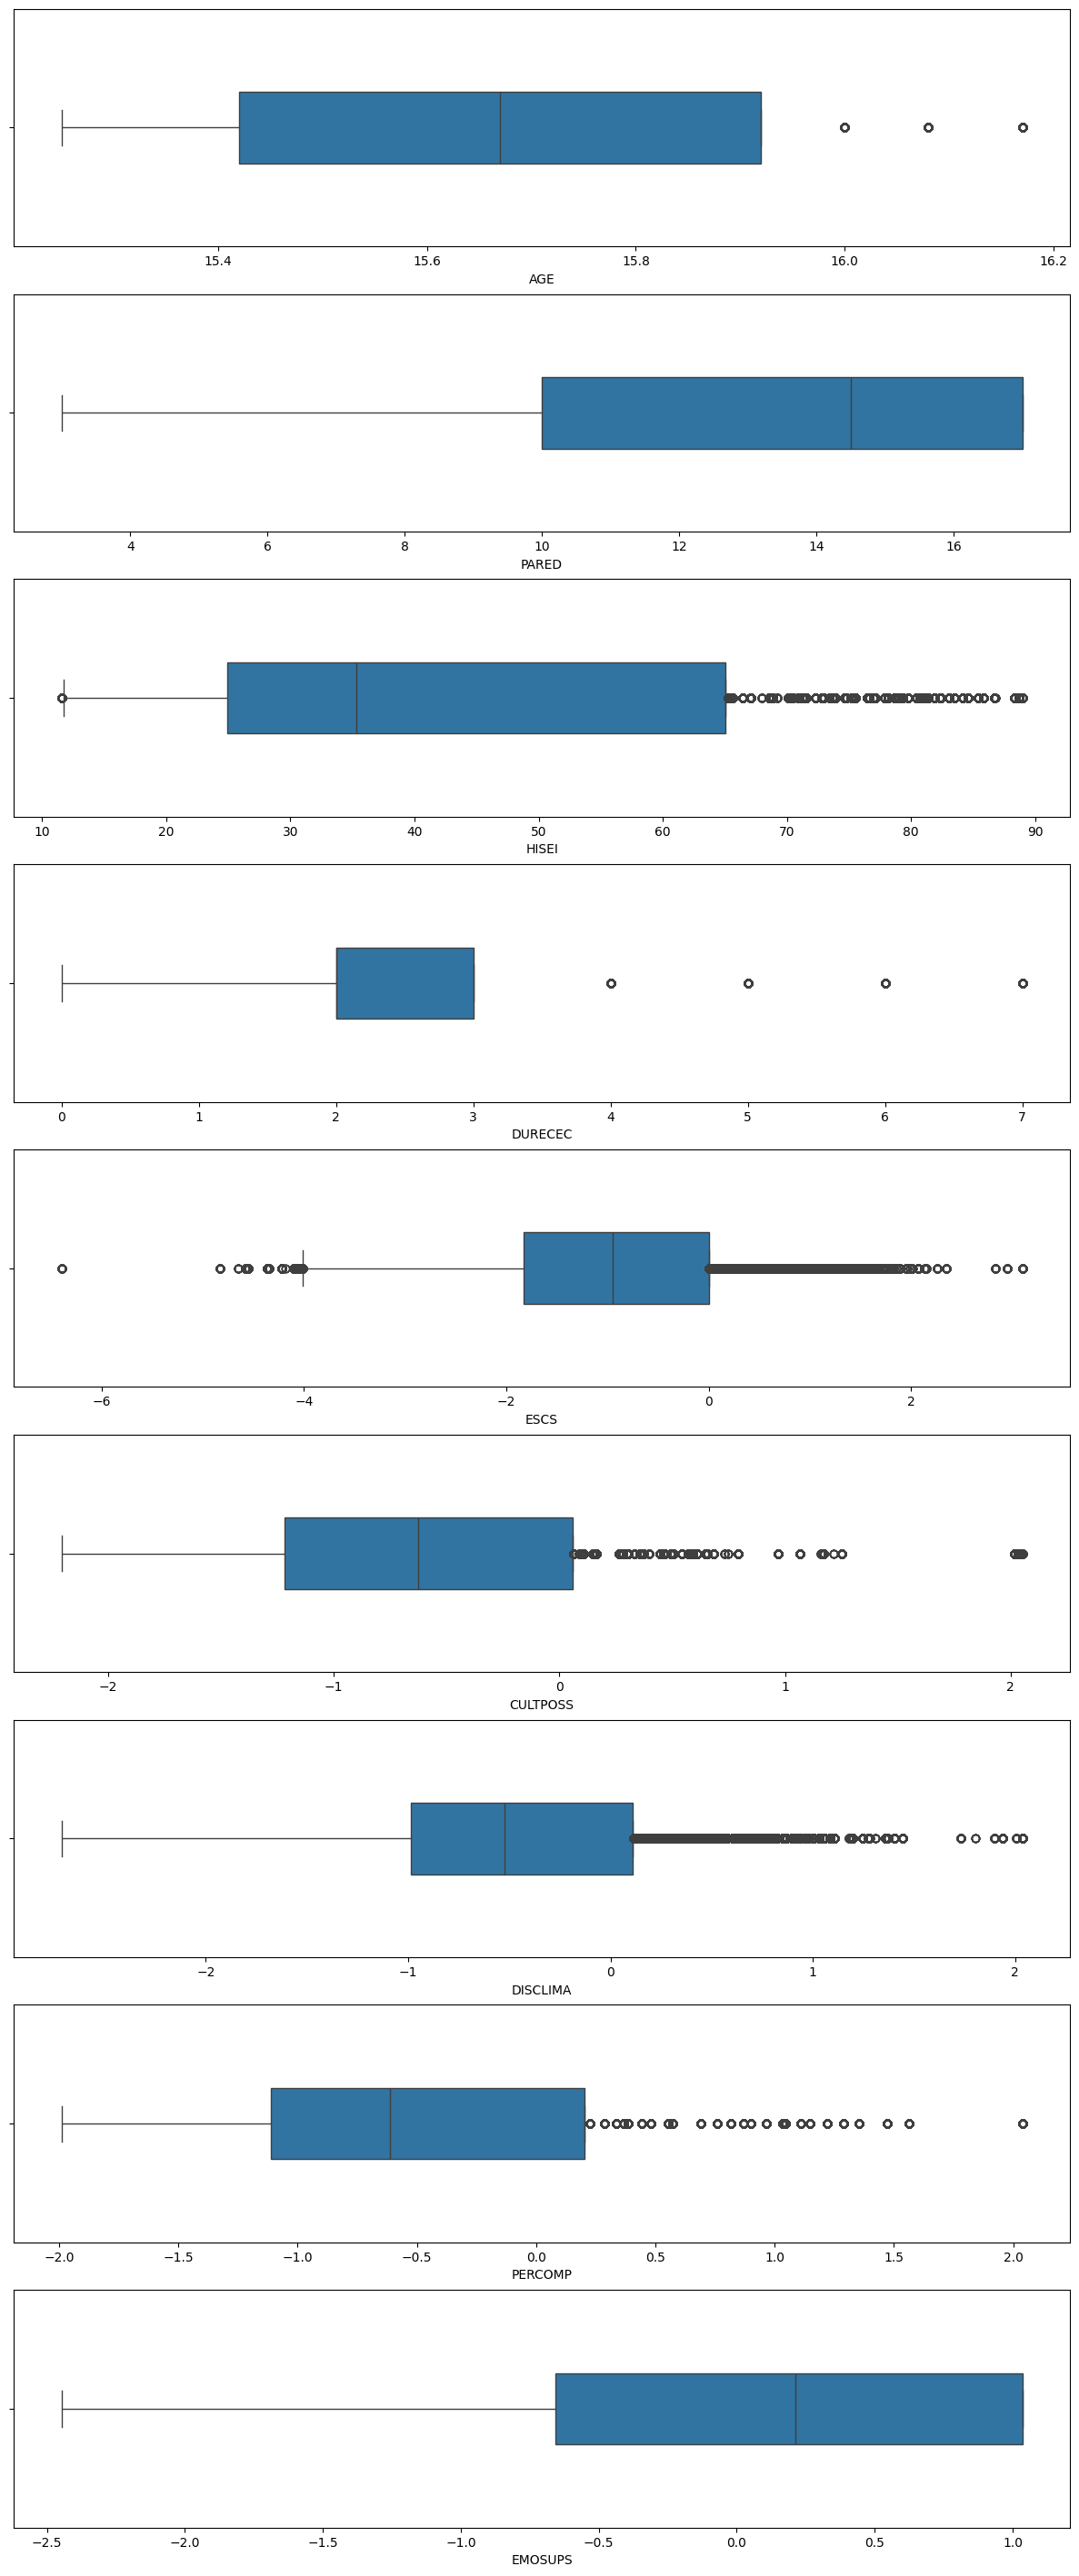

In [ ]:
# La base anterior había quedado con índices repetidos luego de aplicar la
# ponderación. Los box-plots no se pueden hacer sobre DataFrames con índices duplicados,
# por eso hacemos el reset_index
continuous_stu = ['AGE', 'PARED', 'HISEI', 'DURECEC', 'ESCS', 'CULTPOSS', 'DISCLIMA', 'PERCOMP', 'EMOSUPS']
continuous_stu_amount = len(continuous_stu)

fig, axes = plt.subplots(nrows=continuous_stu_amount, ncols=1, figsize=(15,4*continuous_stu_amount))
for i, index in enumerate(continuous_stu):
    sns.boxplot(x=index, data=stu_sch_merged, whis=(0.25, 0.85), width=0.3, ax=axes[i])

Vemos que `PARED` y `HISEI` no tienen valores outliers, mientras que `ESCS` sí.

Más adelante (en el Colab de análisis), verificamos que estos outliers tienen un efecto muy limitado al aplicar una regresión en `ESCS` vs `MATH`, `READ` y `SCIE`. En otras palabras, los outliers muy bajos están asociados a notas también bajas.

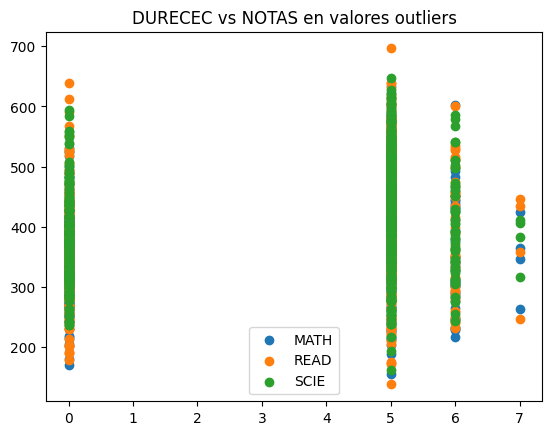

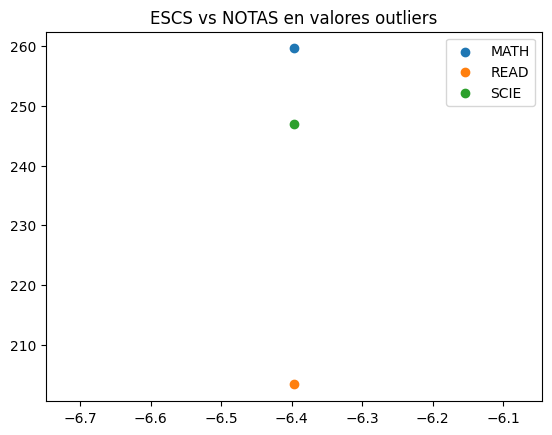

In [ ]:
def compute_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return list(df[df[column].apply(lambda x: x <= lower_bound or x >= upper_bound)].index)

outliers = {}
for var in continuous_stu:
    outliers_indexes = compute_outliers(stu_sch_merged, var)
    if len(outliers_indexes) > 0:
        # Hacemos drop_duplicates porque en la ponderada el mismo alumno está repetido
        # varias veces
        outliers_df = stu_sch_merged.iloc[outliers_indexes,:].\
            drop_duplicates(subset='CNTSTUID')[[var, 'MATH', 'READ', 'SCIE']].\
            sort_values(by=var)
        plt.scatter(outliers_df[var], outliers_df['MATH'], label='MATH')
        plt.scatter(outliers_df[var], outliers_df['READ'], label='READ')
        plt.scatter(outliers_df[var], outliers_df['SCIE'], label='SCIE')
        plt.title(f'{var} vs NOTAS en valores outliers')
        plt.legend()
        plt.show()

Lo guardamos en un csv para tenerlo como checkpoint:

In [78]:
len(stu_sch_merged)

566250

In [ ]:
# stu_sch_merged.to_csv(
#     path_or_buf='/content/drive/MyDrive/DiploDatos2024/ActividadIntegradoraFinal/data/pisa_merged_entrega1.csv'
# )